# Øving 1, TMA4320

* **Veiledning:** Foregår via Mattelab og Zoom, torsdag 20.01 kl. 10.15-12.00 og fredag 21.01 kl.08.15-10.00  vil det være opplegg for å melde inn ønske om Zoom-veiledning, følg med på Mattelab for organisering av dette.
* **Innleveringsfrist:** Mandag 24.01, kl. 23.59.
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på skjema med kontrollspørsmål under Øving 1 i Blackboard (minst 5 av 8 oppgaver må være besvart). 
    
Før du utfører øvingen, gå gjennom notatene

* [Introduction to Jupyter with Python](http://www.math.ntnu.no/emner/TMA4320/2022v/notebooks/Introduction.ipynb)
* [Preliminaries](http://www.math.ntnu.no/emner/TMA4320/2022v/notebooks/Preliminaries.ipynb)

Teorien brukt i denne øvingen finner du i notatet

* [Numerical Solution of Nonlinear Equations](http://www.math.ntnu.no/emner/TMA4320/2022v/notebooks/NonLinearEquations.ipynb) 

Det er lagt inn noen **Tenk over**. Dette er spørsmål som ikke behøver besvares som en del av øvingen, men som kan dukke opp som eksamensspørsmål. Disse handler ofte om sammenheng mellom numeriske resultater og teori.  

In [63]:
%matplotlib inline

import numpy as np
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

**Oppgave 1**

La oss starte med intervallhalveringsmetoden. Vi søker nullpunkter i funksjonen
$$
f(x)=e^x+x^2-x-4 = 0
$$

**(a)** Start med å lage en Python-funksjon som definerer $f(x)$ og plott den i intervallet $[-2,2]$.

**Kontrollspørsmål 1** Hvor mange nullpunkter har $f(x)$ i dette intervallet sett ut fra grafen?


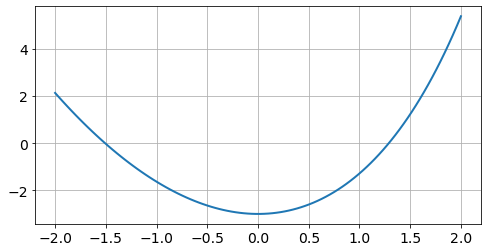

In [64]:
# Fyll inn kode her
def f1(x):
    return np.exp(x)+x**2-x-4

x = np.linspace(-2,2,100)
plt.plot(x,f1(x))


**(b)**
I denne oppgaven skal du bruke funksjonen `bisection()` til å beregne en av røttene til ligningen. 
Start med intervallet $[0,2]$, og bruk toleransen $10^{-6}$. 

**Tenk over:**
* Hvilken av røttene er det sannsynlig at iterasjonene konvergerer mot? 
* Hvor mange iterasjoner trengs for å oppnå en nøyaktighet på minst $|x_k-r|\leqslant 10^{-7}$?
* Hva skjer hvis du prøver med intervallet $[-2,2]$? 

Hvordan sammenfaller dette med det du faktisk oppnår? 

**Kontrollspørsmål 2** Er roten du får ut med inngangsverdiene  $[a,b] =[0,2]$ og toleranse $10^{-6}$ større eller mindre enn 1.29?

**Kontrollspørsmål 3** Hvor mange intervallhalveringer bruker funksjonen for å finne svaret?

In [65]:
def bisection(f, a, b, tol=1.e-6, max_iter = 100):
    ''' Solve the scalar equation f(x)=0 by bisection 
        The result of each iteration is printed
    Input:
        f:        The function. 
        a, b:     Interval: 
        tol :     Tolerance
        max_iter: Maximum number of iterations
    Output:
        the root and the number of iterations.
    '''
    fa = f(a)
    fb = f(b)

    assert fa*fb<0, 'Error: f(a)*f(b)>0, there may be no root in the interval.'
    
    for k in range(max_iter):
        c = 0.5*(a+b)                 # The midpoint
        fc = f(c)                   
        print(f"k ={k:3d}, a = {a:.6f}, b = {b:.6f}, c = {c:.6f}, f(c) = {fc:10.3e}")
        if abs(f(c)) < 1.e-14 or (b-a) < 2*tol:     # The zero is found!
            break 
        elif fa*fc < 0:               
            b = c                     # There is a root in [a, c]
        else:
            a = c                     # There is a root in [c, b]  
    return c, k

In [66]:
# Fyll inn kode her

c, k  = bisection(f1, 0, 2, tol=1.e-6, max_iter = 100)

k =  0, a = 0.000000, b = 2.000000, c = 1.000000, f(c) = -1.282e+00
k =  1, a = 1.000000, b = 2.000000, c = 1.500000, f(c) =  1.232e+00
k =  2, a = 1.000000, b = 1.500000, c = 1.250000, f(c) = -1.972e-01
k =  3, a = 1.250000, b = 1.500000, c = 1.375000, f(c) =  4.707e-01
k =  4, a = 1.250000, b = 1.375000, c = 1.312500, f(c) =  1.256e-01
k =  5, a = 1.250000, b = 1.312500, c = 1.281250, f(c) = -3.851e-02
k =  6, a = 1.281250, b = 1.312500, c = 1.296875, f(c) =  4.286e-02
k =  7, a = 1.281250, b = 1.296875, c = 1.289062, f(c) =  2.002e-03
k =  8, a = 1.281250, b = 1.289062, c = 1.285156, f(c) = -1.830e-02
k =  9, a = 1.285156, b = 1.289062, c = 1.287109, f(c) = -8.158e-03
k = 10, a = 1.287109, b = 1.289062, c = 1.288086, f(c) = -3.081e-03
k = 11, a = 1.288086, b = 1.289062, c = 1.288574, f(c) = -5.400e-04
k = 12, a = 1.288574, b = 1.289062, c = 1.288818, f(c) =  7.308e-04
k = 13, a = 1.288574, b = 1.288818, c = 1.288696, f(c) =  9.537e-05
k = 14, a = 1.288574, b = 1.288696, c = 1.288635

**Oppgave 2**

Denne oppgaven går ut på å løse ligningen 
$$
f(x)=e^x+x^2-x-4 = 0
$$
ved hjelp av fikspunktiterasjoner. Her er tre mulige måter å skrive disse ligningene om på fikspunktform:
$$
 \begin{array}{ll}
    i)   &x=g_1(x) =\ln(4+x-x^2) \\[2mm]
    ii)  &x=g_2(x) = \sqrt{-e^x+x+4} \\[2mm]
    iii) \qquad &x=g_3(x) = e^x+x^2-4
  \end{array}
$$
Bruk koden `fixedpoint()`  til å finne ei rot av $f(x)$ ved bruk av fikspunktiterasjoner. 
Bruk $x_0=1.5$ som startverdi, og $Tol=10^{-6}$. 

**Kontrollspørsmål 4**  Hvilke av de tre omskrivningene konvergerer mot rota $r = 1.288677967$.

Regn ut $g'(r)$ for de tre tilfellene, og **tenk over** hvordan resultatet over kan forklares ved bruk av fikspunktteoremet. 

In [67]:
def fixedpoint(g, x0, tol=1.e-8, max_iter=30):
    ''' Solve x=g(x) by fixed point iterations
        The output of each iteration is printed
    Input:
        g:   The function g(x)
        x0:  Initial values
        tol: The tolerance
    Output:
        The root and the number of iterations
    '''
    x = x0
    print(f"k ={0:3d}, x = {x:14.10f}") 
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-x_old)               # Error estimate
        print(f"k ={k+1:3d}, x = {x:14.10f}") 
        if err < tol:                    # The solution is accepted 
            break
    return x, k+1

In [68]:
# Fyll inn kode her
def g1(x):
    return np.log(4+x-x**2)
def g2(x):
    return np.sqrt(-np.exp(x)+x +4)
def g3(x):
    return np.exp(x)+x**2-4

fixedpoint(g2, x0 = 1.5, tol=1.e-6, max_iter=30)

k =  0, x =   1.5000000000
k =  1, x =   1.0091139329
k =  2, x =   1.5053054929
k =  3, x =   0.9998878264
k =  4, x =   1.5105995169
k =  5, x =   0.9905322092
k =  6, x =   1.5158710552
k =  7, x =   0.9810634053
k =  8, x =   1.5211088914
k =  9, x =   0.9714992449
k = 10, x =   1.5263017049
k = 11, x =   0.9618589916
k = 12, x =   1.5314381740
k = 13, x =   0.9521632379
k = 14, x =   1.5365070839
k = 15, x =   0.9424337713
k = 16, x =   1.5414974395
k = 17, x =   0.9326934087
k = 18, x =   1.5463985775
k = 19, x =   0.9229658020
k = 20, x =   1.5512002794
k = 21, x =   0.9132752165
k = 22, x =   1.5558928786
k = 23, x =   0.9036462847
k = 24, x =   1.5604673626
k = 25, x =   0.8941037426
k = 26, x =   1.5649154652
k = 27, x =   0.8846721509
k = 28, x =   1.5692297481
k = 29, x =   0.8753756100
k = 30, x =   1.5734036689


(1.5734036688636315, 30)

**Oppgave 3**

**(a)** Vis at $r=\sqrt(3)$ er et fikspunkt av 
$$
   x = g(x) = \frac{2x}{3}+\frac{1}{x}
$$

**(b)** Løs ligningen over ved bruk av `fixedpoint()`. Bruk $x_0=1.5$ og $Tol=1.e-5$.

**Kontrollspørsmål 5** Hvor mange iterasjoner ble brukt? 

In [70]:
# Fyll inn kode her
# a) r = sqrt(3) er et fikspunkt av g(x) ettersom g(sqrt(3)) = sqrt(3)

def g4(x):
    return (2*x)/3 + 1/x

fixedpoint(g4, x0 = 1.5, tol=1.e-5, max_iter=30)


k =  0, x =   1.5000000000
k =  1, x =   1.6666666667
k =  2, x =   1.7111111111
k =  3, x =   1.7251563252
k =  4, x =   1.7297618312
k =  5, x =   1.7312888251
k =  6, x =   1.7317969252
k =  7, x =   1.7319661925
k =  8, x =   1.7320226039
k =  9, x =   1.7320414065
k = 10, x =   1.7320476739


(1.7320476738993622, 10)

Resten av denne oppgaven handler om å bruke siste del av fikspunktteoremet, og vise hvordan man kan verifisere teori med numeriske eksperimenter. 
Du behøver ikke levere inn utregningene, bare svare på kontrollspørsmålene. Men dette er potensielle eksamensoppgaver, så det kan være fornuftig å gjøre dem.

**(c)** 
Gitt intervallet $[1.5,2.0]$. 

**Tenk over** om $g$ oppfyller alle betingelsene i *Fikspunktteoremet* i dette intervallet, og at $|g'(x)|\leq 5/12$ for alle $x\in[1.5,2.0]$. 

Bruk deretter *A-priori feilestimatet* fra fikspunktteoremet til å finne maksimalt antall iterasjoner $k_{maks}$ som trengs for at feilen $|x_k-r|$ garantert skal være mindre enn $10^{-5}$. Bruk $L=5/12$ og $x_0=1.5$.

**Kontrollspørsmål 6**: Hva er $k_{maks}$? 

**(d)** Modifiser `fixedpoint()` slik at du stopper iterasjonene når når den virkelige feilen $|r-x_k|<=1.e-5$.

**Kontrollspørsmål 7**: Hvor mange iterasjoner ble brukt denne gangen? 

*Sjekk*: Svaret fra kontrollspørsmål 8 bør være mindre eller lik enn svaret i kontrollspørsmal 7. Men det behøver ikke være lik svaret i kontrollspørsmål 6 (hvorfor ikke)?

In [72]:
# Fyll inn kode her

def kmax(x0,x1, L=5/12, tol=1.e-5, max_iter = 50):
    for i in range(max_iter+1):
        e_k = ((L**i)/(1))*abs(x1-x0)
        print("k =",i," e_k =", e_k)
       
        if e_k < tol:
            break
        
kmax(x0 = 1.5, x1 = 2, L=5/12, tol=1.e-5, max_iter = 50)

def fixedpoint(g, x0, r, tol=1.e-8, max_iter=30):
    x = x0
    print(f"k ={0:3d}, x = {x:14.10f}") 
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-r)                   # actual error 
        print(f"k ={k+1:3d}, x = {x:14.10f}") 
        if err < tol:                    # The solution is accepted 
            break
    return x, k+1

def g4(x):
    return (2*x)/3 + 1/x

fixedpoint(g4, x0 = 1.5, r = np.sqrt(3), tol=1.e-5, max_iter=30)

k = 0  e_k = 0.5
k = 1  e_k = 0.20833333333333334
k = 2  e_k = 0.08680555555555557
k = 3  e_k = 0.03616898148148149
k = 4  e_k = 0.015070408950617287
k = 5  e_k = 0.006279337062757203
k = 6  e_k = 0.0026163904428155014
k = 7  e_k = 0.0010901626845064589
k = 8  e_k = 0.0004542344518776913
k = 9  e_k = 0.00018926435494903804
k = 10  e_k = 7.886014789543251e-05
k = 11  e_k = 3.2858394956430214e-05
k = 12  e_k = 1.3690997898512591e-05
k = 13  e_k = 5.70458245771358e-06
k =  0, x =   1.5000000000
k =  1, x =   1.6666666667
k =  2, x =   1.7111111111
k =  3, x =   1.7251563252
k =  4, x =   1.7297618312
k =  5, x =   1.7312888251
k =  6, x =   1.7317969252
k =  7, x =   1.7319661925
k =  8, x =   1.7320226039
k =  9, x =   1.7320414065


(1.7320414065093055, 9)

**(e)**
Siste skritt er å demonstrere lineær konvergens, slik det er forklart i [Preliminaries](http://www.math.ntnu.no/emner/TMA4320/2022v/notebooks/Preliminaries.ipynb), kapittelet om *Convergence of an iterative process*.

Vi har konvergens av orden $p$ hvis   
$$
    |r-x_{k+1}| = C_k|r-x_k|^p, \qquad  C_k \rightarrow C \text{ når } k\rightarrow \infty
$$

Modifiser `fixedpoint()` igjen slik at den returnerer feilen $|r-x_k|$ for alle $k$. 
Bruk `tol=1.e-8` og `x_0=1.5`.  Bruk dette til å beregne $C$ og $p$ slik det er forklart i *Preliminaries*.

**Tenk over** om svaret er det du forventer.

**Kontrollspørsmål 8** Hvilken beregnet verdi får du for $C$?

In [62]:
def fixedpoint(g, x0, r, tol=1.e-8, max_iter=30):
    x = x0
    print(f"k ={0:3d}, x = {x:14.10f}") 
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-r)                   # actual error 
        print(f"k ={k+1:3d}, x = {x:14.10f}, error = {err:10.3e}") 
        if err < tol:                    # The solution is accepted 
            break
    return x, k+1

def g4(x):
    return (2*x)/3 + 1/x

fixedpoint(g4, x0 = 1.5, r = np.sqrt(3), tol=1.e-8, max_iter=30)

#lineær konvergens: p=1. Ønsker å finne C
#Sjekker for k = 15, da det er den største verdien vi har for k
r = np.sqrt(3)
k_16 = 1.7320508033
k_15 = 1.7320507947
C_k = abs(r-k_16)/abs(r-k_15)

print(C_k)

k =  0, x =   1.5000000000
k =  1, x =   1.6666666667, error =  6.538e-02
k =  2, x =   1.7111111111, error =  2.094e-02
k =  3, x =   1.7251563252, error =  6.894e-03
k =  4, x =   1.7297618312, error =  2.289e-03
k =  5, x =   1.7312888251, error =  7.620e-04
k =  6, x =   1.7317969252, error =  2.539e-04
k =  7, x =   1.7319661925, error =  8.462e-05
k =  8, x =   1.7320226039, error =  2.820e-05
k =  9, x =   1.7320414065, error =  9.401e-06
k = 10, x =   1.7320476739, error =  3.134e-06
k = 11, x =   1.7320497630, error =  1.045e-06
k = 12, x =   1.7320504594, error =  3.482e-07
k = 13, x =   1.7320506915, error =  1.161e-07
k = 14, x =   1.7320507689, error =  3.869e-08
k = 15, x =   1.7320507947, error =  1.290e-08
k = 16, x =   1.7320508033, error =  4.299e-09
0.33172103153427523
